In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r'C:\Users\nares\OneDrive\Desktop\SMS_Spam_Classifier\spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## data cleaning
EDA
text preprocessing
model building
evalution
improvement

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True , axis = 1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.duplicated().value_counts()

False    5169
True      403
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().value_counts()

False    5169
dtype: int64

In [9]:
df.rename(columns={'v1':'Target', 'v2': 'text'}, inplace=True)
df

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Target'] =  encoder.fit_transform(df['Target'])
df

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


0 = ham
1 = spam

## EDA

In [11]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [12]:
fig = px.pie(df['Target'],names='Target',labels='Target')
fig.show()

In [13]:
import nltk

In [14]:
df['text_length'] = df['text'].apply(lambda x : len(x))
df

,Target,text,text_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [15]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df

,Target,text,text_length,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [16]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

,Target,text,text_length,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [17]:
df.describe()

,Target,text_length,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [18]:
df[df['Target'] ==0].describe()
#ham messages

,Target,text_length,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [19]:
df[df['Target'] ==1].describe()
#spam messages

,Target,text_length,num_words,num_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


### visulaization

## data preprocessing
- lower case
- tokenazstion
- remeving special character
- stop words and punctuation
- stemming and lemmitization

In [20]:
from nltk.corpus import stopwords
import string
string.punctuation
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
def transfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 

    text = y[:]
    y.clear()

    for i in text:
        y.append(lemmatizer.lemmatize(i))

    return " ".join(y)

In [23]:
text  = "Hh hello 50"
transfrom_text(text)

'hh hello 50'

In [24]:
df['text'] = df['text'].apply(transfrom_text)

In [25]:
df

,Target,text,text_length,num_words,num_sent
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah think go usf life around though,61,15,1
...,...,...,...,...,...
5567,1,2nd time tried 2 contact u pound prize 2 claim...,161,35,4
5568,0,b going esplanade fr home,37,9,1
5569,0,pity mood suggestion,57,15,2
5570,0,guy bitching acted like interested buying some...,125,27,1


In [26]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

## SPAM Message word cloud

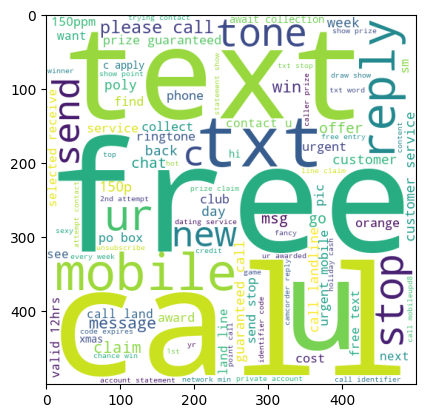

In [27]:
spam_wc = wc.generate(df[df['Target']==1]['text'].str.cat(sep=" "))
plt.imshow(spam_wc)

## HAM Message word cloud

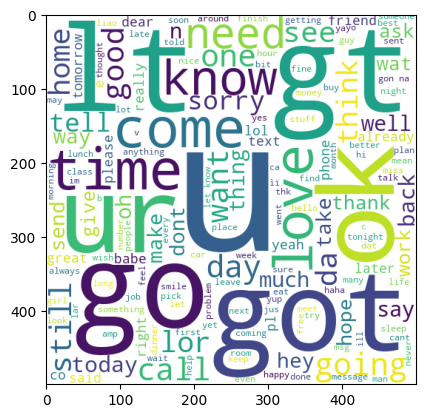

In [28]:
ham_wc = wc.generate(df[df['Target']==0]['text'].str.cat(sep=" "))
plt.imshow(spam_wc)

model building

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [30]:
X = cv.fit_transform(df['text']).toarray()
X.shape

(5169, 7490)

In [31]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [35]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### Gausian Nave Bayes

In [36]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8945841392649904
[[807  89]
 [ 20 118]]
0.5700483091787439


### Multinomial Nave bayes

In [37]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[870  26]
 [ 12 126]]
0.8289473684210527


### Bernoli nave bayes


In [38]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9690522243713733
[[893   3]
 [ 29 109]]
0.9732142857142857


##Now using TFIDF 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [40]:
X = tfidf.fit_transform(df['text']).toarray()
X.shape

(5169, 7490)

In [41]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8887814313346228
[[807  89]
 [ 26 112]]
0.5572139303482587


In [44]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9535783365570599
[[896   0]
 [ 48  90]]
1.0


In [45]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9690522243713733
[[893   3]
 [ 29 109]]
0.9732142857142857


## All the classifier

In [46]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
# svc = SVC(kernel='sigmoid',gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier()
# lrc = LogisticRegression()
# rfc = RandomForestClassifier()
# abc = AdaBoostClassifier()
# bc = BaggingClassifier()
# etc = ExtraTreesClassifier()
# gbdt = GradientBoostingClassifier()
# xgb = XGBClassifier()


In [48]:
clfs = {
    
}

In [49]:
import pickle 
#pickle.dump(tfidf, open('vecotizor.pkl','wb'))
pickle.dump(mnb, open('mnb.pkl','wb'))